# Project: Wrangling and Analyze Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import time
import datetime
import requests
import json
import tweepy
import io
import os

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twit_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twit_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# URL downloaded programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#Connect to twitter api

consumer_key = 'Secret'
consumer_secret = 'Secret'
access_token = 'Secret'
access_secret = 'Secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# I downloaded tweet Json from Udcity cite

# Empty list to convert to DataFrame
dateframe_list = []

# Open text file for reading
with open ('/content/tweet_json', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON string status into a dictionary and reading each line as a dictionary
        each_tweet_line = json.loads(line)
        # Getting the required parameters
        tweet_id = each_tweet_line['id']
        retwt_count = each_tweet_line['retweet_count']
        fav_count = each_tweet_line['favorite_count']
        follows_count = each_tweet_line['user']['followers_count']
        frnds_count = each_tweet_line['user']['friends_count']
        
        dateframe_list.append({'id': tweet_id,
                       'retweet_count': retwt_count,
                       'favorite_count': fav_count,
                       'followers_count': follows_count,
                       'friends_count': frnds_count})
        
tweet_json = pd.DataFrame(dateframe_list, columns=['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

In [8]:
dateframe_list

[{'id': 892420643555336193,
  'retweet_count': 8853,
  'favorite_count': 39467,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 892177421306343426,
  'retweet_count': 6514,
  'favorite_count': 33819,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891815181378084864,
  'retweet_count': 4328,
  'favorite_count': 25461,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891689557279858688,
  'retweet_count': 8964,
  'favorite_count': 42908,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891327558926688256,
  'retweet_count': 9774,
  'favorite_count': 41048,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891087950875897856,
  'retweet_count': 3261,
  'favorite_count': 20562,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 890971913173991426,
  'retweet_count': 2158,
  'favorite_count': 12041,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 890729181411237888,
  'retweet_count': 16716,
 

In [9]:
tweet_json

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104
2350,666044226329800704,147,311,3201018,104
2351,666033412701032449,47,128,3201018,104
2352,666029285002620928,48,132,3201018,104


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
df1 = twit_archive


In [11]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
df2 = image_prediction

In [13]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
df3 = tweet_json

In [15]:
df3

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104
2350,666044226329800704,147,311,3201018,104
2351,666033412701032449,47,128,3201018,104
2352,666029285002620928,48,132,3201018,104


### Summraies of **twitter_archive & image_prediction & tweet_json**

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
 4   friends_count    2354 non-null   int64
dtypes: int64(5)
memory usage: 92.1 KB


### Statistical description of **twitter_archive & image_prediction & tweet_json**

In [19]:
df1.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df3.describe()

,id,retweet_count,favorite_count,followers_count,friends_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03,2354.0
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06,104.0
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01,0.0
min,6.660209e+17,0.000000,0.000000,3.200799e+06,104.0
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06,104.0
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06,104.0
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06,104.0
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06,104.0


In [22]:
print("number of rows and columns in twitter_archive dataframe: ")

df1.shape

number of rows and columns in twitter_archive dataframe: 


(2356, 17)

In [23]:
print("number of rows and columns in image_prediction dataframe: ")

df2.shape

number of rows and columns in image_prediction dataframe: 


(2075, 12)

In [24]:
print("number of rows and columns in tweet_json dataframe: ")

df3.shape

number of rows and columns in tweet_json dataframe: 


(2354, 5)

In [25]:
# Get the number of missing values in our twitter_archive data
df1.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
# Get the number of missing values in our image_prediction data
df2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
# Get the number of missing values in our tweet_json data
df3.isnull().sum()

id                 0
retweet_count      0
favorite_count     0
followers_count    0
friends_count      0
dtype: int64

In [28]:
# Get the numbe rof unique values in the columns in our twitter_archive data
df1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [29]:
# Get the number of unique values in the columns in our image_prediction data
df2.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [30]:
# Get the number of unique values in the columns in our tweet_json data
df3.nunique()

id                 2354
retweet_count      1724
favorite_count     2007
followers_count      66
friends_count         1
dtype: int64

In [31]:
# Get the number of duplicate rows in our twitter_archive data
df1.duplicated().sum()

0

In [32]:
# Get the number of duplicate rows in our image_prediction data
df2.duplicated().sum()

0

In [33]:
# Get the number of duplicate rows in our tweet_json data
df3.duplicated().sum()

0

In [34]:
# retrive the name of the columns
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [35]:
# Checking for IDs with values in retweet_status_id, retweeted_status_user_id, and
# retweeted_status_timestamp columns
df1[df1['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [ ]:
df1.rating_denominator.value_counts()


10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [ ]:
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [36]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality issues
There is a lot of Quality issues in twitter archive & image_predictions & tweet_json:



1. in twitter archive  timestamp column is string and should be datetime
2. in twitter archive tweet id column is a int and should be string
3. in twitter archive there is missing values in expanded_url cloumn
4. in the name cloumn there is invalid names which are not dog names and all lowercase
5. in image predictions dataframe tweet id coulmn is in int and should be a string
6. in tweet_json dataframe tweet id coulmn is in int and should be a string
7. in twitter archive there is columns like retweeted(status id, status user, status timestamp) missing data
8. in twitter archive columns of (in_reply_to_status_id and in_reply_to_user_id)  contain missing values

+


10. in tweet json df followers count column has only 66 values and friends count column has only 1 value.
11. in image predictions the types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.


### Tidiness issues
1. In twitter archive dataframe merge 'doggo', 'floofer', 'pupper' and 'puppo' columns in df1_clean to be a single column called "Dog stage", and replace empty columns called "None" with Nan

2. Join the 3 dataframes tweet_arch , image, tweet_json so the tweet data can be in a single data frame

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [70]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Issue #1: in twitter archive timestamp column is string and should be datetime

#### Define: Convert the timestamp column from an int to datetime.

#### Code

In [71]:
# Convert timestamp column to datetime
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

#### Test

In [72]:
# Check if our cleaning effort worked
df1_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Issue #2: in twitter archive tweet id column is a int and should be string

#### Define: Convert tweet_id column from integer to string



#### Code

In [73]:
# Convert tweet_id column to string
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)

#### Test

In [74]:
# Check if our cleaning effort worked
df1_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Issue #3: in twitter archive there is missing values in expanded_url cloumn
### also Issue #7 and Issue #8


#### Define: Drop expanded urls since it will not be in our analysis also I will drop retweeted status id and user id and timestamp since its all have huge missing values



**Code:**

In [75]:
# change made after I read reviews 
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]
df1_clean = df1_clean[df1_clean.retweeted_status_user_id.isnull()]
df1_clean = df1_clean[df1_clean.retweeted_status_timestamp.isnull()]

In [76]:
# Make a list of the columns to be dropped
drop_li = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', \
             'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls']

df1_clean.drop(drop_li, axis=1, inplace=True)

**Test:**

In [77]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


### Issue #4: in the name cloumn there is invalid names which are not dog names and all lowercase

#### Define: Drop all values in the name column that started with small letters

#### Code

In [78]:
not_Names = []
for abcc in df1_clean.name:
    if abcc.islower() and abcc not in not_Names:
        not_Names.append(abcc)
    
print(not_Names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [79]:
df1_clean.name.replace(not_Names, 'None', inplace=True)


In [80]:
for abcc in df1_clean.name:
    if abcc.islower():
        print(abcc)

**Test:**

In [81]:
# Sample from edited 'name' and run a few times
df1_clean['name'].sample(10)

145     Neptune
1270      Karma
2021      Patch
2068       None
219       Riley
2110      Paull
1986       None
1696      Champ
1647       None
1451      Wyatt
Name: name, dtype: object

### Issue #5: in image predictions dataframe tweet id coulmn is in int and should be a string

#### Define: Convert the tweet id column from an int to string.

#### Code

In [53]:
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype(str)


#### Test

In [54]:
df2_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #6: in tweet_json dataframe tweet id coulmn is in int and should be a string

#### Define: Convert the tweet id column from an int to string.

#### Code

In [55]:
df3_clean['id'] = df3_clean['id'].astype(str)


#### Test

In [56]:
#rename id column to tweet_id so its match all 3 datafrmae
df3_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

df3_clean.dtypes

tweet_id           object
retweet_count       int64
favorite_count      int64
followers_count     int64
friends_count       int64
dtype: object

**Test:**

In [85]:
df1_clean.head()


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


### **Issue 10 : in tweet json df followers count column has only 66 values and friends count column has only 1 value.**

**Define:**
Drop followers_count and friends_count columns as they don't contain values that would be usable to the analysis.



In [86]:
df3_clean.drop(['followers_count', 'friends_count'], axis=1, inplace=True)


**Test:**

In [87]:
df3_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### **Issue 11 : in image predictions the types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.**

**Define:**
In the image_predictions table, the dogbreeds in the p1, p2, and p3 are not in the same case, convert all the names to lowercase letters. 


In [39]:
df2_clean['p1'] = df2_clean['p1'].str.lower()
df2_clean['p2'] = df2_clean['p2'].str.lower()
df2_clean['p3'] = df2_clean['p3'].str.lower()

**Test:**

In [40]:
df2_clean.p1.head

<bound method NDFrame.head of 0       welsh_springer_spaniel
1                      redbone
2              german_shepherd
3          rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 chihuahua
2073                 chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object>

In [41]:
df2_clean.p2.head

<bound method NDFrame.head of 0                   collie
1       miniature_pinscher
2                 malinois
3                  redbone
4               rottweiler
               ...        
2070      english_springer
2071    labrador_retriever
2072              malamute
2073              pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object>

In [42]:
df2_clean.p3.head

<bound method NDFrame.head of 0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
                   ...             
2070    german_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object>

## **Tidiness issues**

### **Issue 1 : In twitter archive dataframe merge 'doggo', 'floofer', 'pupper' and 'puppo' columns in df1_clean to be a single column called "Dog stage", and replace empty columns called "None" with Nan**

In [ ]:
# First replace None in stage columns with empty string as follows
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)

# Then combine stage columns
df1_clean['stage'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo


# Then format entries with multiple dog stages which appeared like doggopuppo
df1_clean.loc[df1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df1_clean.loc[df1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df1_clean.loc[df1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [ ]:
df1_clean.stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [ ]:
df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df1_clean['stage'] = df1_clean['stage'].replace('', np.nan)

**test**

In [92]:
df1_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


# **Issue 2: merge the 3 datasets**

**Define:**
Merge them using tweet_id column



In [ ]:
data = pd.merge(df1_clean, df2_clean, on='tweet_id', how='inner').merge(df3_clean, on='tweet_id', how='inner' )


In [ ]:
data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   object             
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   rating_numerator    2073 non-null   int64              
 5   rating_denominator  2073 non-null   int64              
 6   name                2073 non-null   object             
 7   stage               320 non-null    object             
 8   jpg_url             2073 non-null   object             
 9   img_num             2073 non-null   int64              
 10  p1                  2073 non-null   object             
 11  p1_conf             2073 non-null   float64            
 12  p1_dog              2073 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
data.to_csv("twitter_archive_master.csv", index=False)


In [ ]:
data = pd.read_csv("twitter_archive_master.csv")


In [ ]:
data.sample()


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
860,743210557239623680,2016-06-15 22:36:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Kayla, an underground poker legend. Playe...",10,10,Kayla,NaN,https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg,1,...,0.930705,True,Chesapeake_Bay_retriever,0.025934,True,Labrador_retriever,0.007535,True,1560,4215


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [ ]:
# Looking at the statistical description of our master dataset
data.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000
mean,7.383634e+17,12.265798,10.511819,1.203570,0.594532,1.346665e-01,6.034005e-02,2976.089243,8556.718283
std,6.780118e+16,40.699924,7.180517,0.561856,0.271234,1.006830e-01,5.092769e-02,5054.897526,12098.640994
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000
25%,6.764706e+17,10.000000,10.000000,1.000000,0.364095,5.390140e-02,1.619920e-02,634.000000,1674.000000
50%,7.119681e+17,11.000000,10.000000,1.000000,0.588230,1.186220e-01,4.947150e-02,1408.000000,3864.000000
75%,7.931959e+17,12.000000,10.000000,1.000000,0.843911,1.955730e-01,9.193000e-02,3443.000000,10937.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [ ]:
data.name.value_counts() / data.shape[0] * 100

None          32.657984
Charlie        0.530632
Lucy           0.482393
Oliver         0.482393
Tucker         0.482393
                ...    
Lenox          0.048239
Tilly          0.048239
Harvey         0.048239
Blanket        0.048239
Christoper     0.048239
Name: name, Length: 914, dtype: float64

### Insights:
1. The minimum favorite count is 0, mean is 8556 and the maximum is 132810

2. The minimum retweet count is 16, mean is 2976 and the maximum is 79515

3. About 32% of the dogs have no name

### Visualization

Question 1: How many image number occured most for each tweet's most confident image prediction?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Distribution of Tweet Image Number')

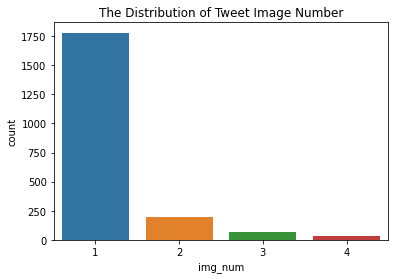

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data.img_num)
plt.title('The Distribution of Tweet Image Number')

In [ ]:
data.img_num.value_counts()


1    1779
2     197
3      66
4      31
Name: img_num, dtype: int64

Question 2: What is the most popular dog stage according to the neural network's image prediction?

Text(0.5, 1.0, 'The Distribution of Dog Stages')

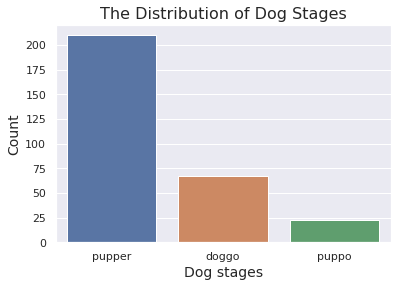

In [ ]:
sns.set(style = 'darkgrid')
sorted_age = data['stage'].value_counts().head(3).index
sns.countplot(data = data, x ='stage', order = sorted_age, orient='h')
plt.xlabel('Dog stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Dog Stages', fontsize=16)

In [ ]:
data.stage.value_counts()


pupper           210
doggo             67
puppo             23
doggo,pupper      11
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

Looking at the distribution of dog images, it shows that 'pupper' (a small doggo, usually younger) is the most popular dog stage, followed by 'doggo' and 'puppo'. It could be due to the fact that young and unmatured dog is usually cuter than the adult dog. It should also be noticed that there's huge amount of missing data in the dog stages, thus the distribution may not reflect the truth.